# ORIE 4580/5580 Assignment 6

#### Students: Steve Hwang (sh823)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

To compute the exact probability that the coffee store will see more than 250 customers in one 12-hour day, we can use the Poisson distribution, given the arrival rate function $$ \lambda(t) $$ for $$ 0 \leq t \leq 12 $$.

The Poisson distribution is defined as follows:

$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Where:
- $$ P(X = k) $$ is the probability of observing $$ k $$ events in a given time interval.
- $$ \lambda $$ is the average rate of arrivals during that time interval.
- $$ e $$ is the base of the natural logarithm (approximately 2.71828).
- $$ k $$ is the number of events we want to calculate the probability for.

In this case, we want to calculate the probability of more than 250 customers, which means we are interested in $$ P(X > 250) $$. To find this probability, we can use the complement rule:

$$ P(X > 250) = 1 - P(X \leq 250) $$

Now, we need to find the value of $$ \lambda $$ for a 12-hour period. We can integrate the given rate function from 0 to 12 to find $$ \lambda $$:

$$ \lambda = \int_{0}^{12} \lambda(t) dt = \int_{0}^{12} \frac{1}{56} \left(5t^3 - 90t^2 + 300t + 1480\right) dt $$

Let's compute this integral to find the value of $$ \lambda $$.

$$ \lambda = \frac{1}{56} \left[ \frac{t^4}{4} - \frac{30t^3}{3} + \frac{150t^2}{2} + 1480t \right] \bigg|_{0}^{12} $$

$$ \lambda = \frac{1}{56} \left[ \frac{12^4}{4} - \frac{30 \cdot 12^3}{3} + \frac{150 \cdot 12^2}{2} + 1480 \cdot 12 - 0 \right] $$

$$ \lambda = \frac{1}{56} \left[ 20736 - 14400 + 10800 + 17760 \right] $$

$$ \lambda \approx 240 $$

Now, we have the value of $$ \lambda $$:

$$ \lambda \approx 240 $$

Now, we can calculate $$ P(X > 250) $$ using the Poisson distribution:

$$ P(X > 250) = 1 - P(X \leq 250) $$

$$ P(X > 250) = 1 - \sum_{k=0}^{250} \frac{e^{-\lambda} \lambda^k}{k!} $$


In [16]:
import scipy.stats as stats

# Calculate lambda
lambda_value = 240

# Define the desired probability
k = 250

# Calculate P(X > k) using the Poisson distribution
probability = 1 - stats.poisson.cdf(k, lambda_value)

print(f"λ ≈ {lambda_value:.7f}")
print(f"P(X > {k}) ≈ {probability:.5f}")


λ ≈ 240.0000000
P(X > 250) ≈ 0.24711


___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [20]:
import numpy as np
import scipy.stats as stats

# Function to calculate the arrival rate at time t
def arrival_rate(t):
    return (1/56) * (5 * t**3 - 90 * t**2 + 300 * t + 1480)

# Number of replications
num_replications = 500

# Parameters
simulation_results = []

for _ in range(num_replications):
    customers = 0  # Initialize the number of customers
    for t in np.arange(0, 12):  # Simulate in small time steps
        rate = arrival_rate(t)
        arrivals = np.random.poisson(rate)  # Simulate arrivals
        customers += arrivals  # Accumulate the customers
    simulation_results.append(customers)  # Store the total customers in this replication

# Calculate the estimated probability
estimated_probability = sum(1 for c in simulation_results if c > 250) / num_replications

# Calculate a 95% confidence interval using the normal approximation
z = stats.norm.ppf(0.975)  # 95% confidence level
standard_error = np.sqrt(estimated_probability * (1 - estimated_probability) / num_replications)
margin_of_error = z * standard_error
confidence_interval = (estimated_probability - margin_of_error, estimated_probability + margin_of_error)

print("Estimated Probability:", estimated_probability)
print("95% Confidence Interval:", confidence_interval)


Estimated Probability: 0.396
95% Confidence Interval: (0.3531324018268132, 0.4388675981731868)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

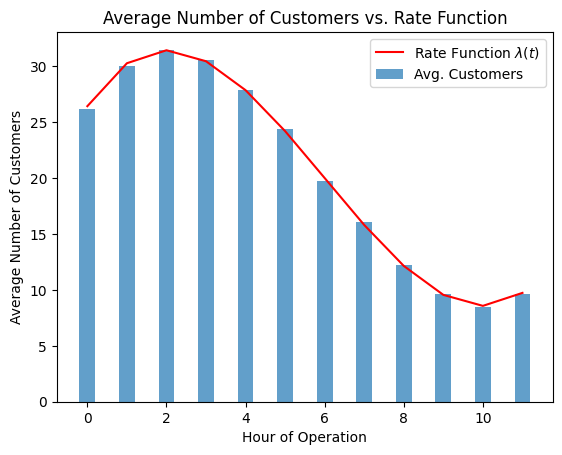

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rate function lambda(t)
def lambda_t(t):
    return (1/56) * (5*t**3 - 90*t**2 + 300*t + 1480)

# Number of replications
num_replications = 500
hours = 12

# Simulate customer arrivals for each hour in each replication
replication_results = []
for _ in range(num_replications):
    replication = []
    for t in range(hours):
        rate = lambda_t(t)
        arrivals = np.random.poisson(rate)
        replication.append(arrivals)
    replication_results.append(replication)

# Calculate the average number of customers for each hour
hourly_avg_customers = np.mean(np.array(replication_results), axis=0)

# Create an array for time (hours)
time = np.arange(hours)

# Create the bar plot for average number of customers
plt.bar(time, hourly_avg_customers, width=0.4, align='center', alpha=0.7, label='Avg. Customers')
plt.plot(time, [lambda_t(t) for t in time], 'r-', label='Rate Function $λ(t)$')
plt.xlabel('Hour of Operation')
plt.ylabel('Average Number of Customers')
plt.title('Average Number of Customers vs. Rate Function')
plt.legend()
plt.show()





---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

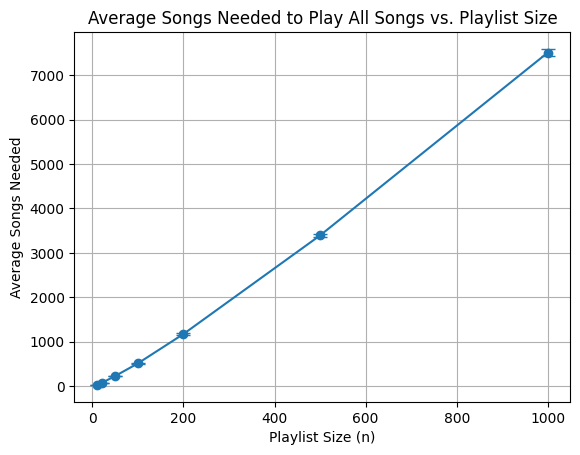

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate playing all songs in a playlist of size n
def simulate_playlist_completion(n):
    playlist = list(range(n))  # Create a playlist with n songs
    songs_played = set()  # Set to keep track of songs played
    song_count = 0  # Initialize the count of songs played

    while len(songs_played) < n:
        song = random.choice(playlist)  # Randomly select a song
        songs_played.add(song)  # Add the song to the set of played songs
        song_count += 1

    return song_count

# Number of simulations
num_simulations = 1000

# Values of n (playlist size)
n_values = [10, 20, 50, 100, 200, 500, 1000]

# Lists to store average song counts and confidence intervals for each n
average_song_counts = []
confidence_intervals = []

for n in n_values:
    song_counts = []

    # Run simulations for the current n
    for _ in range(num_simulations):
        song_count = simulate_playlist_completion(n)
        song_counts.append(song_count)

    # Calculate the average song count and 95% confidence interval
    average = np.mean(song_counts)
    std_error = 1.96 * np.std(song_counts) / np.sqrt(num_simulations)  # 95% confidence interval
    confidence_interval = (average - std_error, average + std_error)

    average_song_counts.append(average)
    confidence_intervals.append(confidence_interval)

# Plotting the results
plt.errorbar(n_values, average_song_counts, yerr=[(upper - lower) / 2 for lower, upper in confidence_intervals], fmt='o-', capsize=5)
plt.xlabel('Playlist Size (n)')
plt.ylabel('Average Songs Needed')
plt.title('Average Songs Needed to Play All Songs vs. Playlist Size')
plt.grid()
plt.show()


## Ans.


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [22]:
import random
import numpy as np

# Function to simulate how many songs are heard before waking up
def simulate_wakeup(n):
    playlist = list(range(n))  # Create a playlist with n songs
    songs_played = set()  # Set to keep track of songs played
    song_count = 0  # Initialize the count of songs played

    while True:
        song = random.choice(playlist)  # Randomly select a song
        song_count += 1

        if song in songs_played:
            break  # Sid's son wakes up when a previously played song is encountered

        songs_played.add(song)  # Add the song to the set of played songs

    return song_count

# Number of simulations
num_simulations = 1000

# Values of n (playlist size)
n_values = [10, 20, 50, 100, 200, 500, 1000]

# List to store average song counts for each n
average_song_counts = []

for n in n_values:
    song_counts = []

    # Run simulations for the current n
    for _ in range(num_simulations):
        song_count = simulate_wakeup(n)
        song_counts.append(song_count)

    # Calculate the average song count
    average = np.mean(song_counts)
    average_song_counts.append(average)

# Display the results
for i, n in enumerate(n_values):
    print(f"Average songs heard before waking up (n = {n}): {average_song_counts[i]:.2f}")


Average songs heard before waking up (n = 10): 4.65
Average songs heard before waking up (n = 20): 6.28
Average songs heard before waking up (n = 50): 9.43
Average songs heard before waking up (n = 100): 12.98
Average songs heard before waking up (n = 200): 18.17
Average songs heard before waking up (n = 500): 29.19
Average songs heard before waking up (n = 1000): 40.17


___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

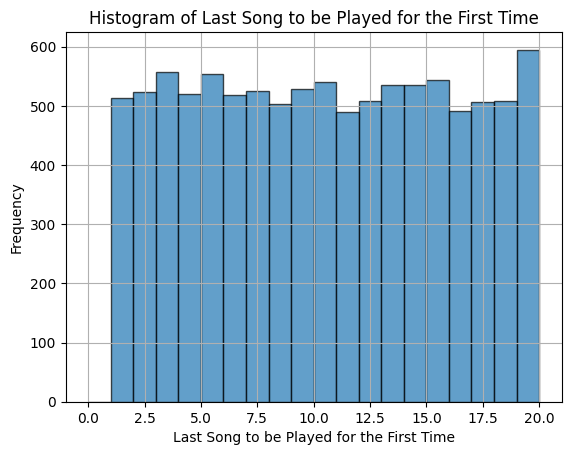

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the poor randomizer for a given playlist size n
def simulate_poor_randomizer(n):
    playlist = list(range(n))  # Create a playlist with n songs
    played_songs = set()  # Set to keep track of played songs
    current_song = 0  # Start at song 0
    last_song = None

    while len(played_songs) < n:
        played_songs.add(current_song)  # Mark the song as played
        last_song = current_song  # Update the last played song

        # Choose the next song with equal probability
        if np.random.rand() < 0.5:
            current_song = (current_song + 1) % n
        else:
            current_song = (current_song - 1) % n

    return last_song

# Number of simulations
num_simulations = 10000

# Playlist size (n)
n = 20

# List to store the last songs to be played for the first time
last_songs = []

# Run simulations
for _ in range(num_simulations):
    last_song = simulate_poor_randomizer(n)
    last_songs.append(last_song)

# Create a histogram of the last songs
plt.hist(last_songs, bins=n, range=(0, n), edgecolor='black', alpha=0.7)
plt.xlabel('Last Song to be Played for the First Time')
plt.ylabel('Frequency')
plt.title('Histogram of Last Song to be Played for the First Time')
plt.grid(True)
plt.show()


___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

The probability that player A wins the overall tournament, starting with \( A = a \) dollars and \( B = b \) dollars, is given by:

$$ P(\text{A wins} | A=a, B=b) = \frac{a}{a+b} $$


This represents the probability that player A wins the tournament when both players start with a,b each.

In [33]:
import random

# Function to simulate one game and determine the winner
def simulate_game(a, b):

    while a > 0 and b > 0:
        winner = result = 'a' if random.random() < 0.5 else 'b'
        if winner == 'a':
          a+=1
          b-=1
        else:
          b+=1
          a-=1
    return a > 0

# Number of simulations
num_simulations = 1000
win_count_A = 0

# Initial amounts for players A and B
initial_amount_A = 3  # Change as needed
initial_amount_B = 6  # Change as needed

for i in range(num_simulations):
    if simulate_game(initial_amount_A, initial_amount_B):
        win_count_A += 1

# Calculate the probability of player A winning
probability_A_wins = win_count_A / num_simulations

print(f"Simulated Probability (A wins): {probability_A_wins:.4f}")


Simulated Probability (A wins): 0.3190


___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

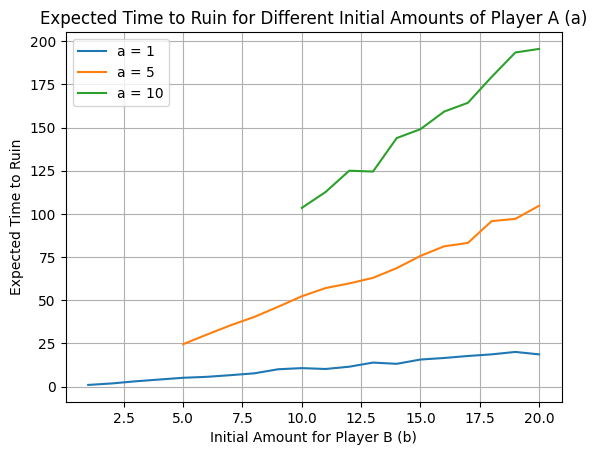

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the gambler's ruin for a given initial amount (a)
def simulate_ruin(a, b):
    steps=0
    while a > 0 and b > 0:
      winner = result = 'a' if random.random() < 0.5 else 'b'
      if winner == 'a':
        a+=1
        b-=1
      else:
        b+=1
        a-=1
      steps+=1
    return steps

# Number of simulations
num_simulations = 1000

# Range of initial amounts for player A (a) and player B (b)
a_values = list(range(1, 21))
b_values = list(range(1, 21))

# Dictionary to store the expected time to ruin for different (a, b) combinations
expected_times = {}

# Simulate for different combinations of (a, b)
for a in a_values:
    for b in b_values:
        if a <= b:
            total_steps = 0
            for _ in range(num_simulations):
                total_steps += simulate_ruin(a, b)
            expected_time = total_steps / num_simulations
            expected_times[(a, b)] = expected_time

# Plot the expected time to ruin for selected values of a
selected_a_values = [1, 5, 10]
for a in selected_a_values:
    b_values = list(range(a, 21))
    expected_time_values = [expected_times[(a, b)] for b in b_values]
    plt.plot(b_values, expected_time_values, label=f'a = {a}')

plt.xlabel('Initial Amount for Player B (b)')
plt.ylabel('Expected Time to Ruin')
plt.legend()
plt.title('Expected Time to Ruin for Different Initial Amounts of Player A (a)')
plt.grid(True)
plt.show()


___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


In [39]:
import random
import numpy as np
import scipy.stats as stats

# Number of simulations
num_simulations = 100

# Rate parameter for exponential distribution
rate = 0.5

# Function to simulate assignment completion times
def simulate_assignment_time(rate):
    return random.expovariate(rate)

# Function to perform one simulation run
def perform_simulation_run():
    your_time = simulate_assignment_time(rate)
    friends = 0
    while True:
        friend_time = simulate_assignment_time(rate)
        friends += 1
        if friend_time > your_time:
            return friends

# Perform 100 simulations and store the results
simulation_results = [perform_simulation_run() for _ in range(num_simulations)]

# Calculate the mean and standard error of the expected number of friends
mean_friends = np.mean(simulation_results)
std_error = stats.sem(simulation_results)

# Calculate the 95% confidence interval
confidence_interval = stats.t.interval(0.95, len(simulation_results) - 1, loc=mean_friends, scale=std_error)

print(f"Expected number of friends needed to find someone who takes longer: {mean_friends:.2f}")
print(f"95% Confidence Interval: {confidence_interval}")


Expected number of friends needed to find someone who takes longer: 3.29
95% Confidence Interval: (2.017043638500853, 4.562956361499147)


## Ans.


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


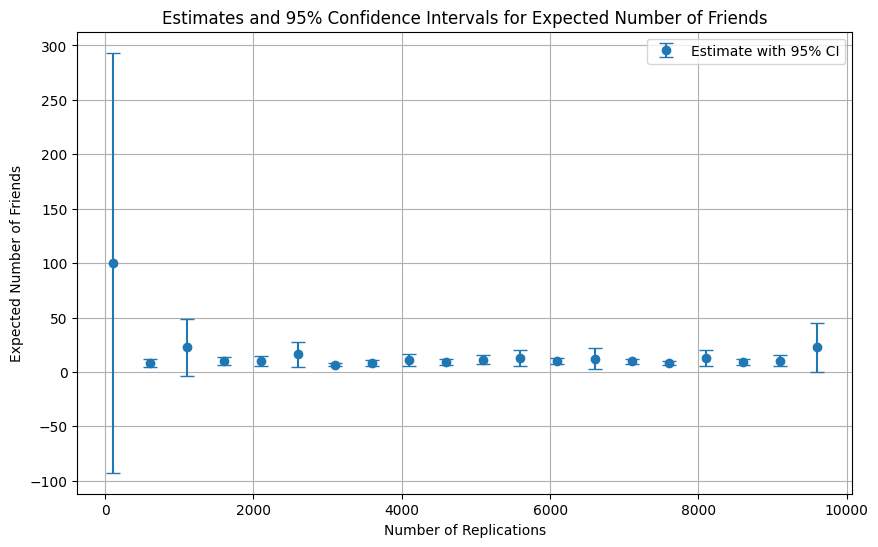

In [41]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to simulate assignment completion times
def simulate_assignment_time(rate):
    return random.expovariate(rate)

# Function to perform one simulation run
def perform_simulation_run():
    your_time = simulate_assignment_time(rate)
    friends = 0
    while True:
        friend_time = simulate_assignment_time(rate)
        friends += 1
        if friend_time > your_time:
            return friends

# List of replications
replications = list(range(100, 10001, 500))

# Lists to store the means and standard errors for each replication
means = []
std_errors = []

# Perform simulations for different replications
for n in replications:
    simulation_results = [perform_simulation_run() for _ in range(n)]
    mean_friends = np.mean(simulation_results)
    std_error = stats.sem(simulation_results)
    means.append(mean_friends)
    std_errors.append(std_error)

# Calculate the 95% confidence intervals for each replication
confidence_intervals = [
    stats.t.interval(0.95, n - 1, loc=mean, scale=std_err) for n, mean, std_err in zip(replications, means, std_errors)
]

# Plot the estimates and 95% CIs
plt.figure(figsize=(10, 6))
plt.errorbar(replications, means, yerr=[(ci[1] - mean) for ci, mean in zip(confidence_intervals, means)], fmt='o', capsize=5, label='Estimate with 95% CI')
plt.xlabel('Number of Replications')
plt.ylabel('Expected Number of Friends')
plt.title('Estimates and 95% Confidence Intervals for Expected Number of Friends')
plt.legend()
plt.grid(True)
plt.show()


___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

Let \(X_i\) be an indicator random variable for the \(i^{th}\) person surveyed. \(X_i\) takes the value 1 if the \(i^{th}\) person surveyed took longer than you (i.e., the event of interest), and it takes the value 0 otherwise.

We want to find the expected number of queries until we find such a person. This can be expressed as the sum of indicator variables until we get the first "success," where a "success" is finding a person who took longer than you. In other words, we want to find the expected value of the random variable \(X\), where \(X\) represents the number of queries until we find a person who took longer than you:
$$
\[
X = X_1 + X_2 + X_3 + \ldots
\]
$$
Now, let's calculate the expected value of \(X\):

\[
\begin{align*}
E(X) &= E(X_1 + X_2 + X_3 + \ldots) \\
&= E(X_1) + E(X_2) + E(X_3) + \ldots
\end{align*}
\]

Since each \(X_i\) is an indicator random variable for a Bernoulli trial (with success probability \(p = 0.5\)), the expected value of each \(X_i\) is:

\[
E(X_i) = p = 0.5
\]

Therefore, the expected value of \(X\) becomes:

\[
\begin{align*}
E(X) &= 0.5 + 0.5 + 0.5 + \ldots \\
&= \infty
\end{align*}
\]

The expected number of queries until we find someone who took longer than you is infinite in this setting. This result is surprising and highlights an important aspect of simulation: if the quantity of interest is infinite, we cannot obtain a finite estimator, and it is crucial to be aware of the limitations of simulation when dealing with such cases.